# **Linear Regression Assignment - BoomBikes Sharing**

## **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## **Business Goal:**
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")

## **Reading and Understanding the Data**

In [2]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Find the number of rows and columns
bike.shape

(730, 16)

In [4]:
# Check the data type descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#summary of numerical columns in the bike dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Dataset Findings**
- There are **730 rows** and **16 columns** in the dataset
- All the columns are of **Float and Integer datatypes except the dteday column which is date object type**
- **No Null values present**

## **Data Quality Checks**

#### **Checking for Row/Column wise null values**

In [6]:
# row-wise null count percentage
round(100*(bike.isnull().sum(axis=1)/len(bike)),2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [7]:
# column-wise null count percentage
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### There are **no NULL/Missing values** in Rows or Columns

#### **Checking for Duplicate rows in dataset**

In [8]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

#### There are **no Duplicate rows** present since number of rows and columns are same as original dataset after duplicate removal logic 

#### **Removing the Redundant columns**

- **Instant column is a unique identifier column** so will not be helpful for our model prediction
- **casual and registered columns add up to target variable cnt** which is the total count
- We already have **other columns like yr, month, weekday, workingday, holiday which explain the dteday column**

In [9]:
bike = bike.drop(['instant','dteday', 'casual', 'registered'],axis =1)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### **Identifying the catagorical and continuous variables**

In [11]:
# if the unique values less than 30 then catagorical else numeric continuous variable
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

#### **Observations**
- **Categorical Features like yr , holiday , workingday are already binary encoded** and hence no further data preparation is needed.
- **Categorical Features like season, weekday, mnth, weathersit we can convert them into categorical variables values using the data dictionary**



In [12]:
# Replacing numbers with labels from the data dictionary reference
season_labels = {
    1 : 'Spring',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}

mnth_labels = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sept',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

weekday_labels = { 
    0 : 'Sun',
    1 : 'Mon',
    2 : 'Tues',
    3 : 'Wed',
    4 : 'Thurs',
    5 : 'Fri',
    6 : 'Sat'
}

weathersit_labels = {
    1 : 'Clear',
    2 : 'Mist + Cloudy',
    3 : 'Light Snow + Rain',
    4 : 'Heavy Rain'
}

# replacing numeric values with labels from data dictionary 
bike['season'] = bike['season'].map(season_labels)
bike['mnth'] = bike['mnth'].map(mnth_labels)
bike['weekday'] = bike['weekday'].map(weekday_labels)
bike['weathersit'] = bike['weathersit'].map(weathersit_labels)

In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [15]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#storing the columns in separate list for analysis 
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### **EDA on the dataset**

#### **Univariate Analysis**

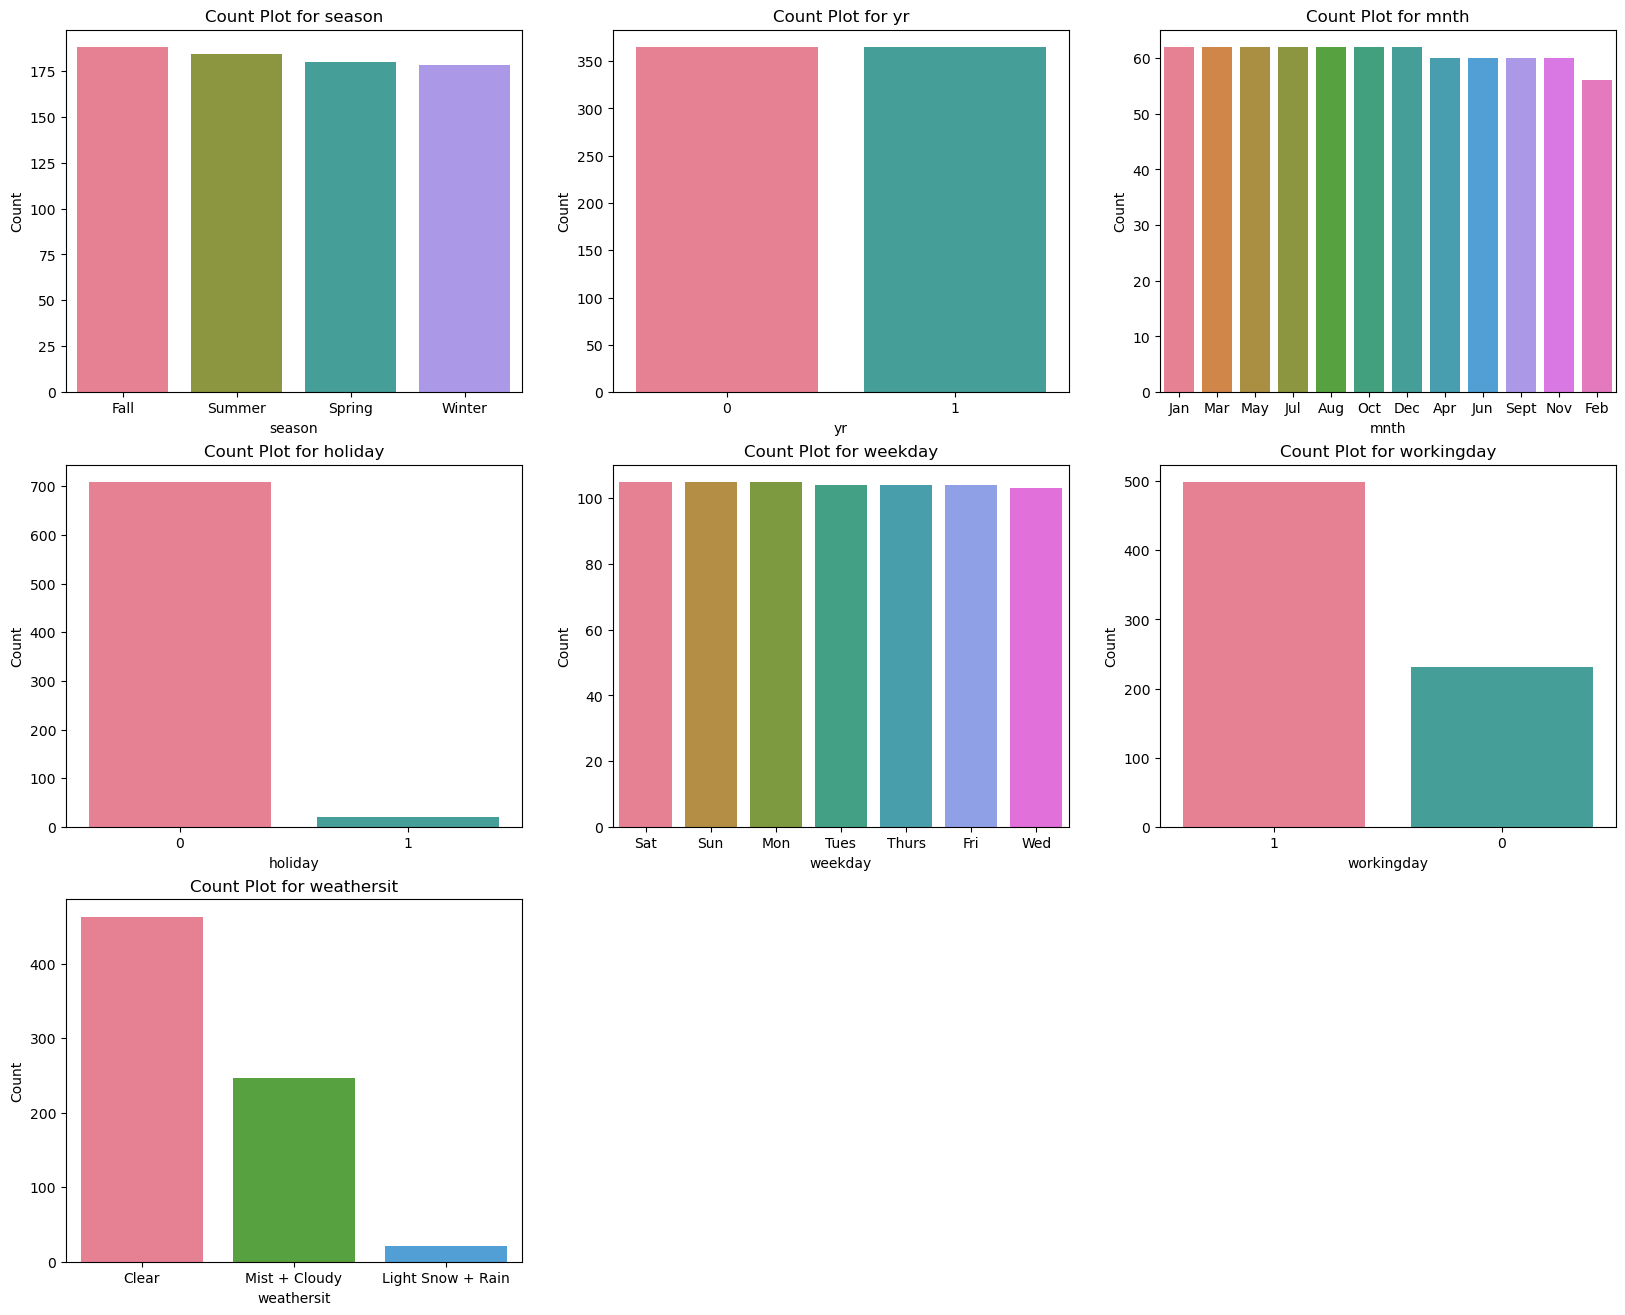

In [17]:
# Function for Ploting the count plots or all the 
def plot_countplot(df, columns):
    plt.figure(figsize=(20,16))
    for index, column in enumerate(columns):
        plt.subplot(3,3,index +1 )
        sns.countplot(x=column, data=df, palette='husl',order=df[column].value_counts().index)
        plt.title(f'Count Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.show()

plot_countplot(bike,categorical_columns)

##### **Observations**
- Significant **more number of records can be observed for Clear, Few clouds, Partly cloudy, Partly cloudy weather.**
- Also the **the number of holidays and non working days are less and so more registrations are seen on non holidays and working days**.

#### **Bivariate Analysis**

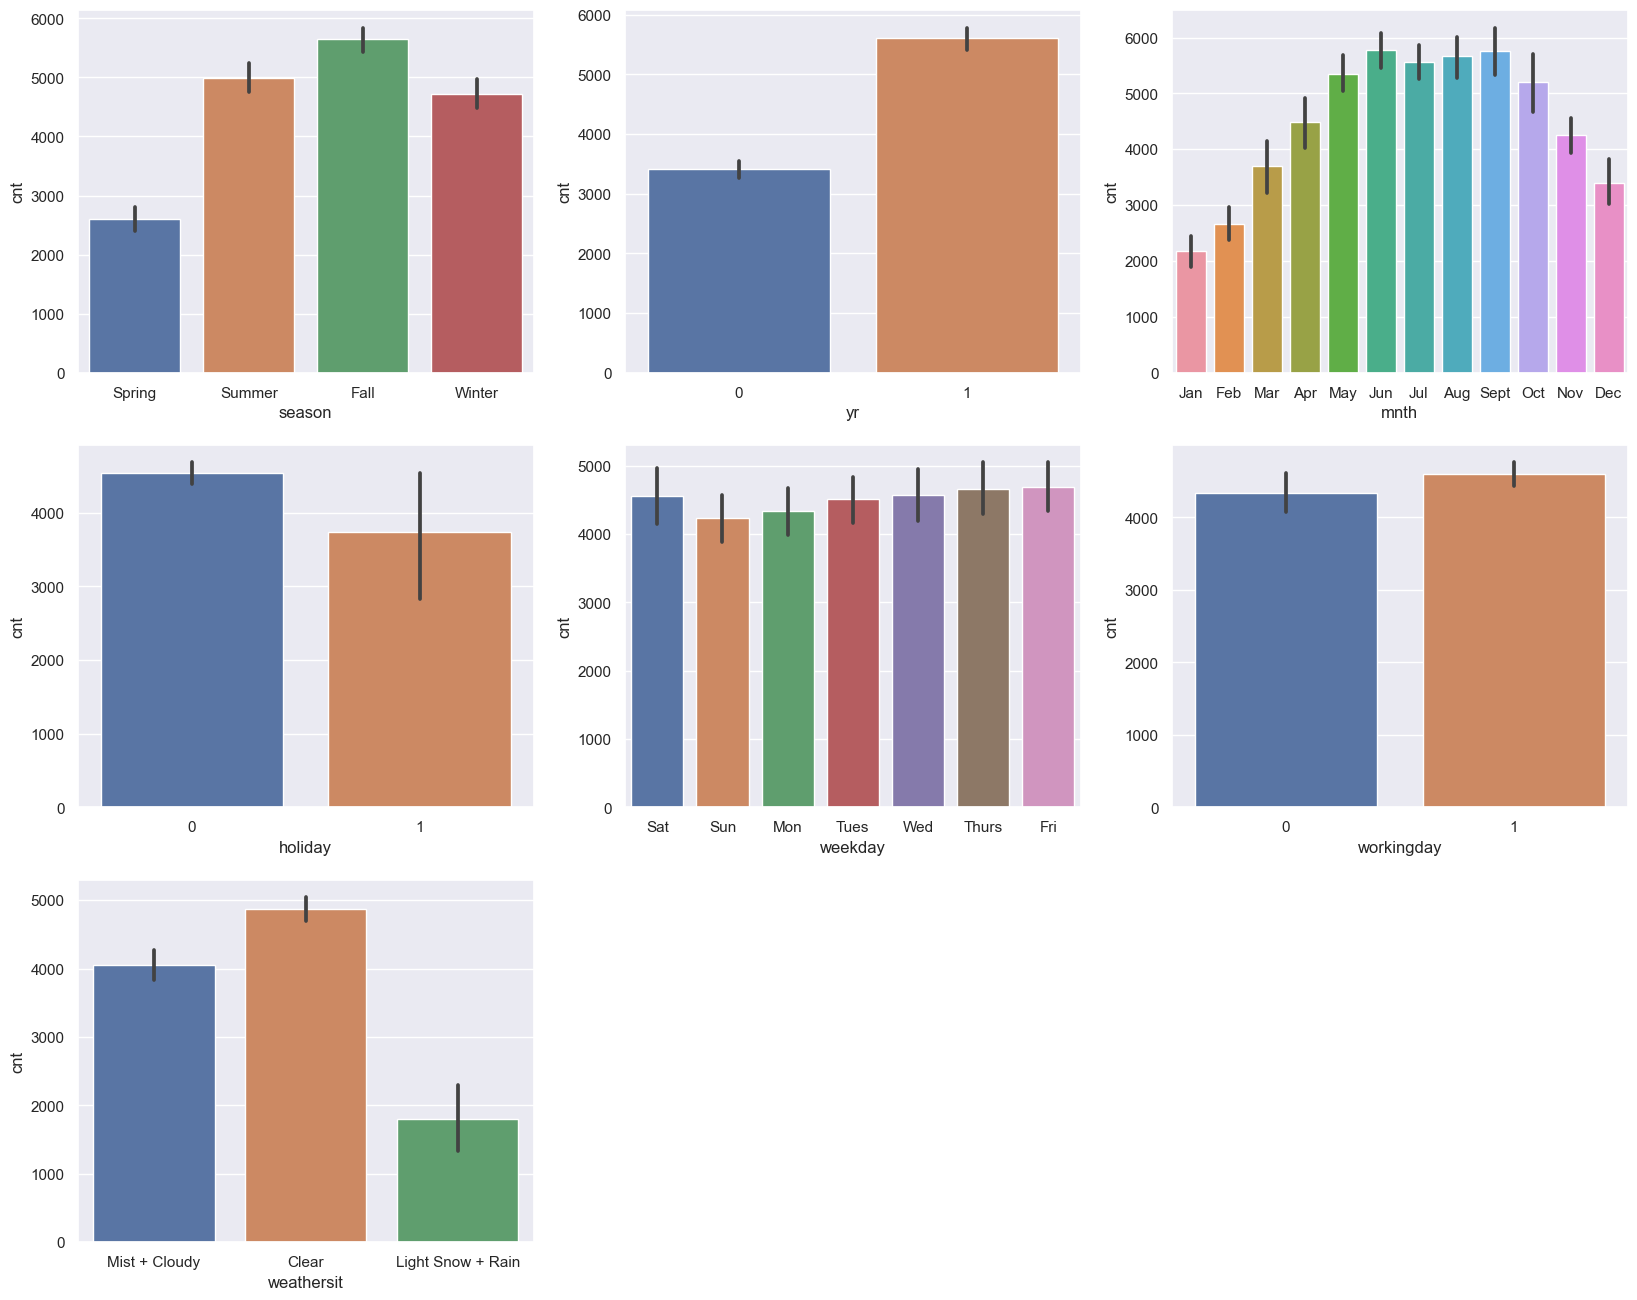

In [18]:
def bivariate_barplot(data,columns):
    sns.set(font_scale=1)
    plt.figure(figsize=(20,16))
    for index, column in enumerate(columns):
        plt.subplot(3,3,index +1 )
        sns.barplot(x = column, y = 'cnt', data=data)
    plt.show()

bivariate_barplot(bike,categorical_columns)

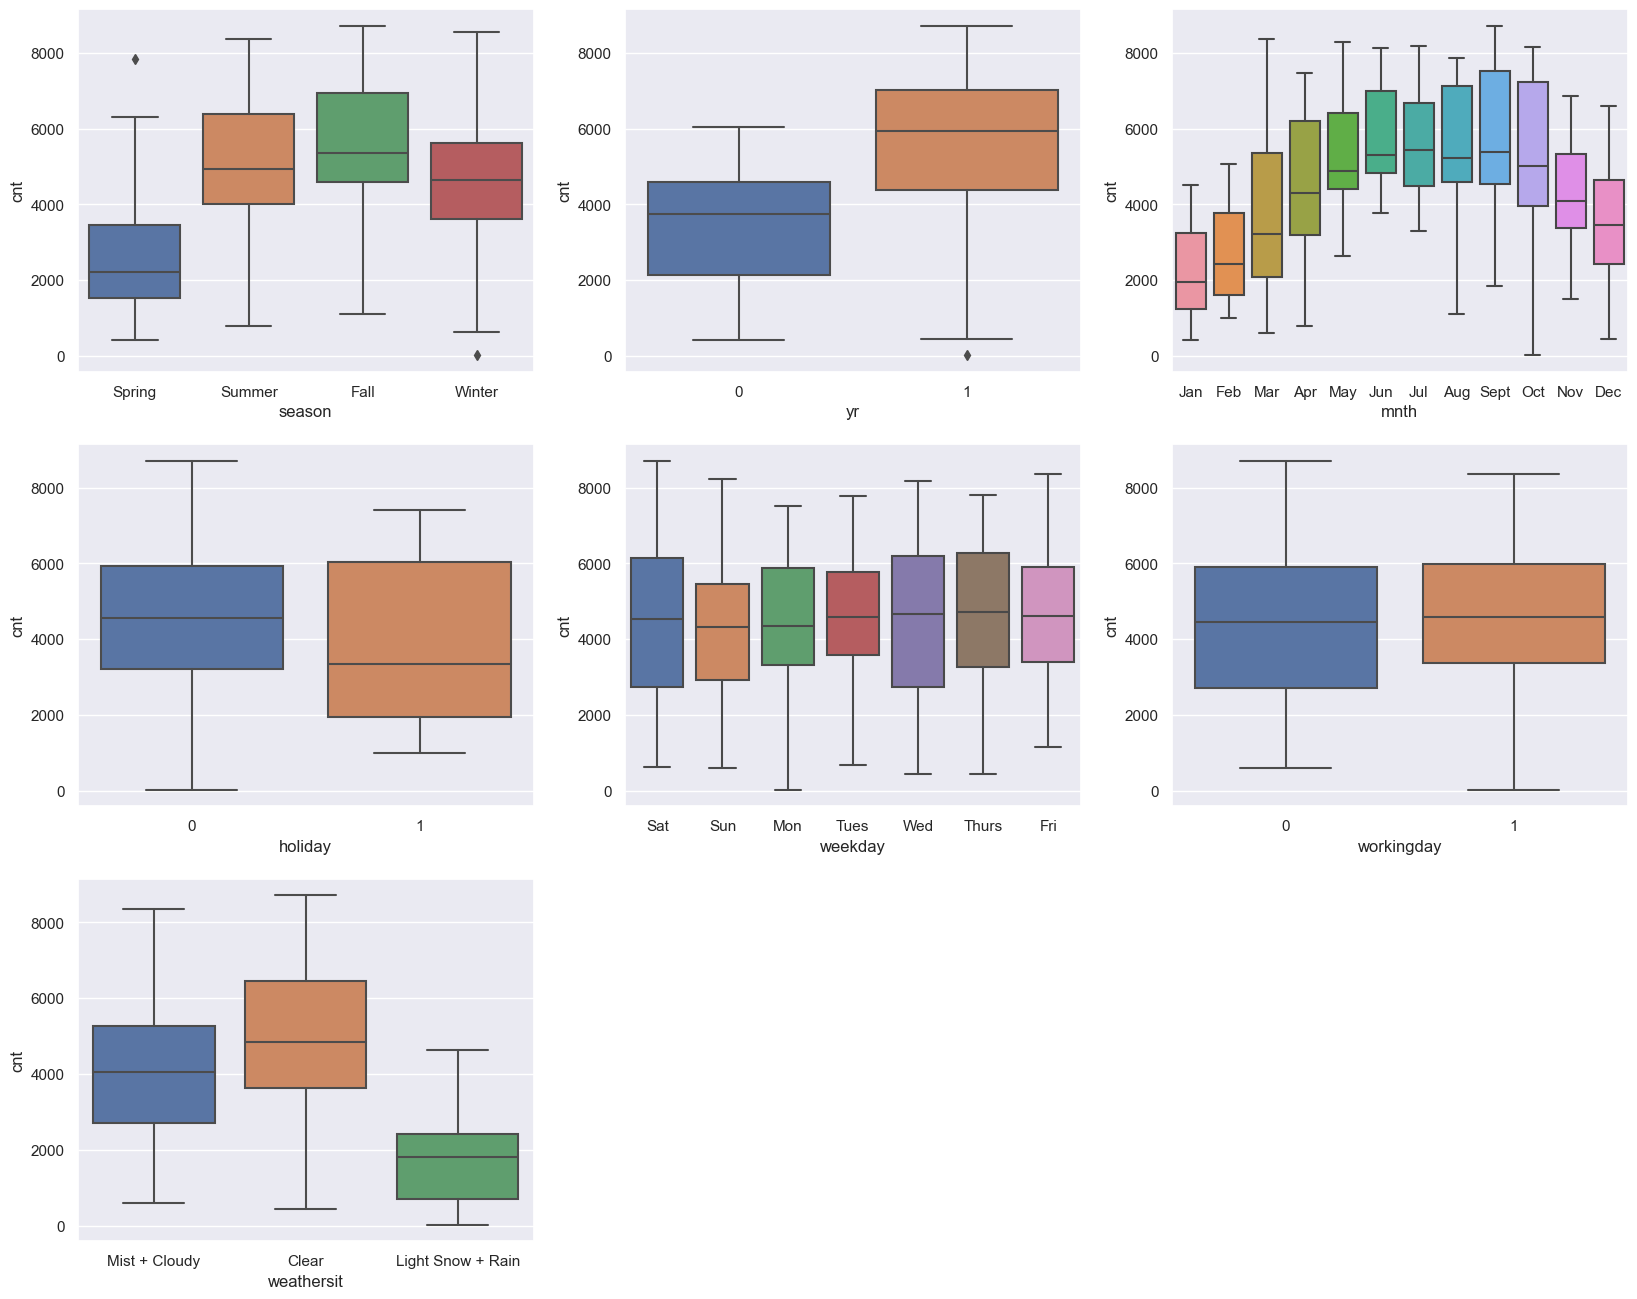

In [19]:
def bivariate_boxplot(data,columns):
    sns.set(font_scale=1)
    plt.figure(figsize=(20,16))
    for index, column in enumerate(columns):
        plt.subplot(3,3,index +1 )
        sns.boxplot(x = column, y = 'cnt', data=data)
    plt.show()

bivariate_boxplot(bike,categorical_columns)

##### **Observations**
- **For the Season plot** : **Fall** has the **hightest rental followed by Summer**, Spring having the least
- **For the yearly plot** : There is year on year **increase number of rentals from 2018 to 2019 by median increase of around 2000**
- **For the monthly plot** : The **months from May to Sept show increase in rentals with median above 4000**, which suggests month might be a good predictor
- **For the holiday plot** : The registration is more for non holiday days but the number of holidays are very less hence this might create some bias in prediction.
- **For the weekday plot** : The **median registrations for all the weekdays is similar** so this variable might have low or no influence in the cnt variable.
- **For the weather plot** : **Clear, Few clouds, Partly cloudy, Partly cloudy weather have more registrations for bike.**

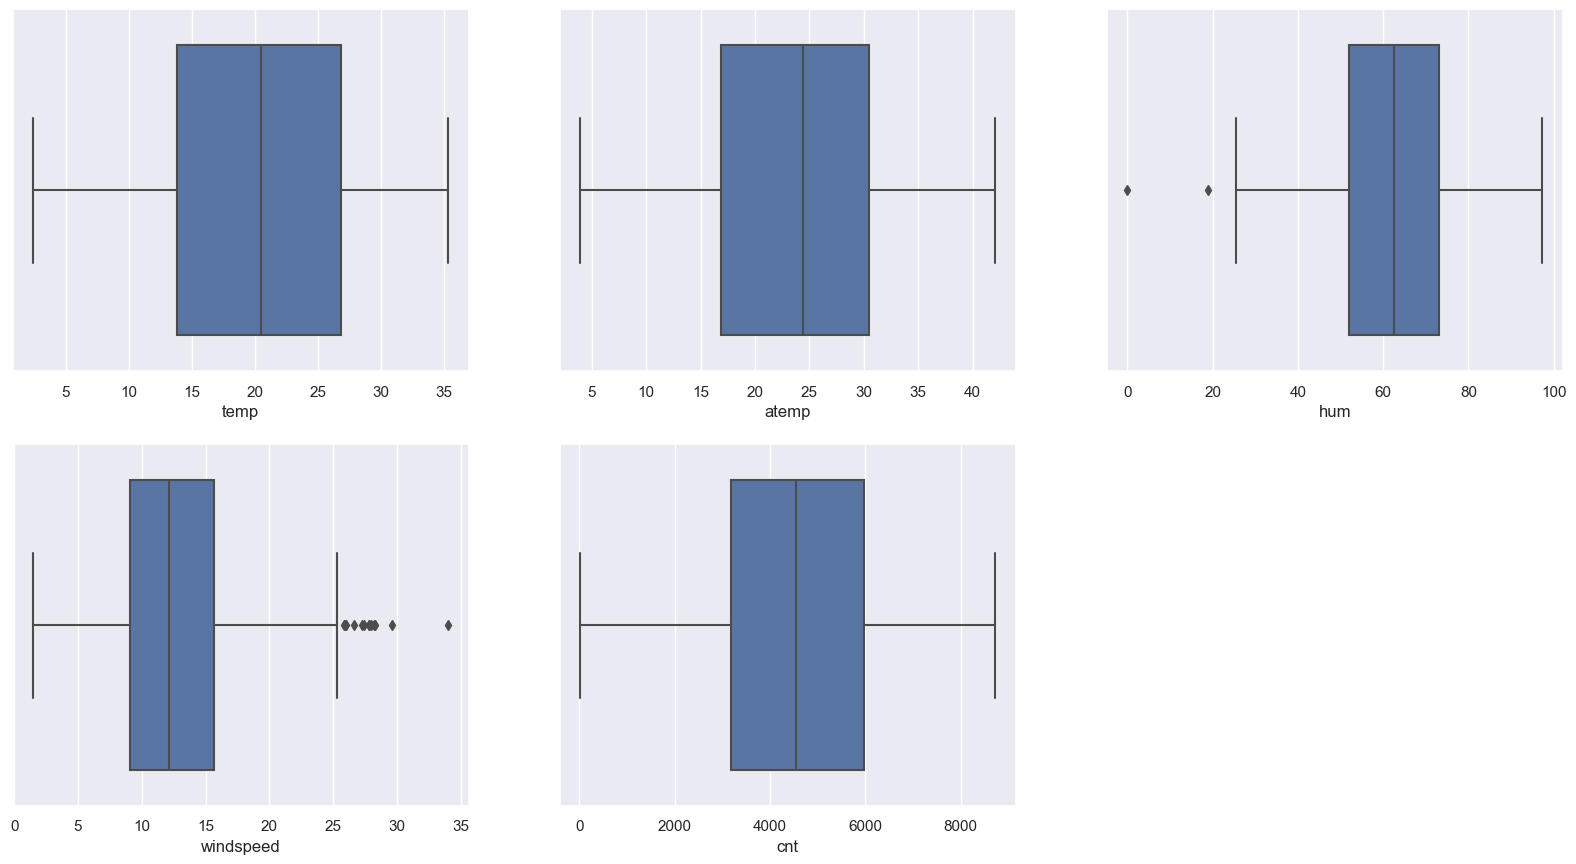

In [20]:
def bivariate_boxplot_num(data,columns):
    sns.set(font_scale=1)
    plt.figure(figsize=(20,16))
    for index, column in enumerate(columns):
        plt.subplot(3,3,index +1 )
        sns.boxplot(x = column, data=data)
    plt.show()
    
bivariate_boxplot_num(bike,numeric_columns)

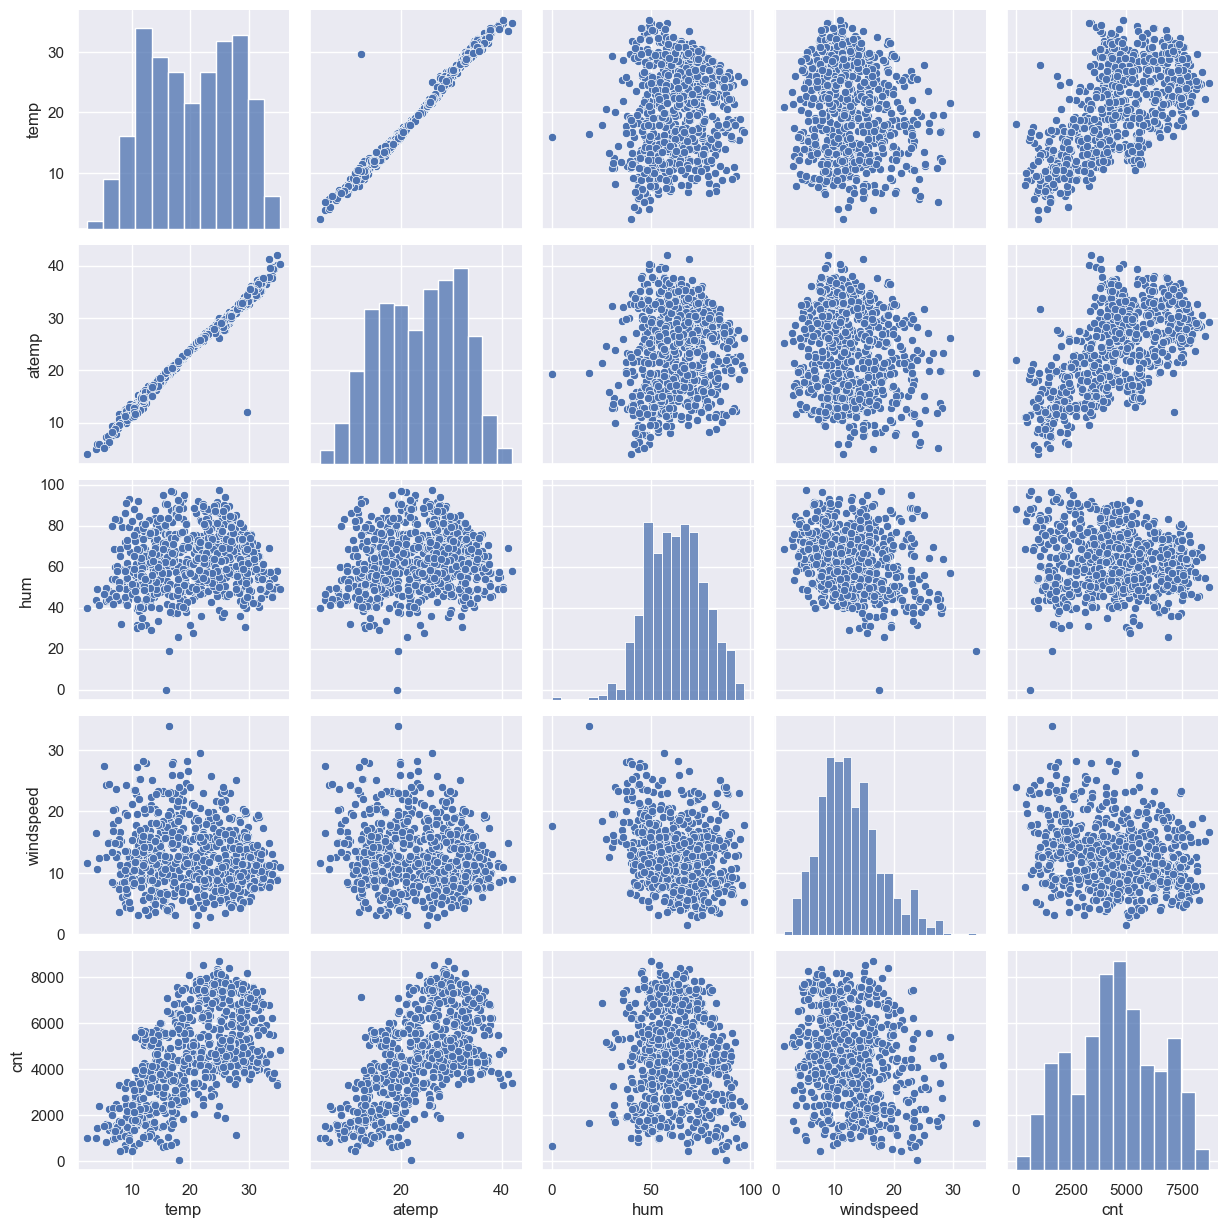

In [21]:
#Plotting pair plot on numerical variables 
sns.pairplot(data=bike[numeric_columns])

#### **Observations**
- The **temp and the atemp columns show similar trends and cnt increases with increase in them**
- The **temp and atemp column are highly correlated to each other and have linear relationship** , one of them can be dropped since it might create a bias in the model.
- Since **adjusted temp column which is the feeling of temparature is calculated from temp we can drop the atemp column.**
- **Humidity has the least correlation with cnt**
- There is **no Significant correlation between hum, temp and windspeed** so lets keep them for model training
- There are few outliers in the numeric variables that need to be handled as they can influence the model.

In [22]:
# Dropping Column 'atemp'
bike = bike.drop(columns=['atemp'])

#### **Handling Outliers**

In [23]:
#Temp has certian 
bike = bike.drop(index = bike[(bike['temp'] > 15) & (bike['temp'] < 20) & (bike['cnt'] < 100)].index)
bike = bike.drop(index = bike[(bike['temp'] > 25) & (bike['temp'] < 30) & (bike['cnt'] < 2000)].index)
bike = bike.drop(index = bike[(bike['temp'] > 34) & (bike['cnt'] > 2000) & (bike['cnt'] < 4000)].index)

#### **Correlation Matrix**

<Axes: >

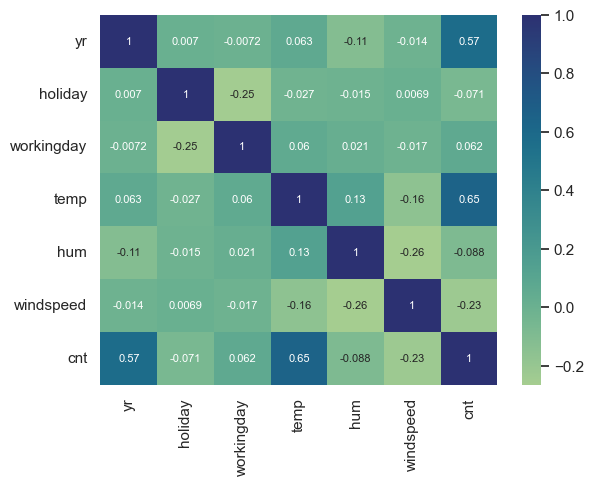

In [24]:
sns.heatmap(bike.corr(numeric_only=True), annot = True, cmap="crest", annot_kws={"size":8})

In [25]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [26]:
bike.shape

(723, 11)

## **Data Preparation**

### **Creating Indicator Variables**

In [27]:
bike = pd.get_dummies(bike, dtype='int64', drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            723 non-null    int64  
 1   holiday                       723 non-null    int64  
 2   workingday                    723 non-null    int64  
 3   temp                          723 non-null    float64
 4   hum                           723 non-null    float64
 5   windspeed                     723 non-null    float64
 6   cnt                           723 non-null    int64  
 7   season_Spring                 723 non-null    int64  
 8   season_Summer                 723 non-null    int64  
 9   season_Winter                 723 non-null    int64  
 10  mnth_Aug                      723 non-null    int64  
 11  mnth_Dec                      723 non-null    int64  
 12  mnth_Feb                      723 non-null    int64  
 13  mnth_Jan  

In [28]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### **Splitting the bike into Train and Test bikeset**

#### We will split the bikeset into **70:30 ratio** using the train_test_split methond in sklearn

In [29]:
#Specifiy the random state to always get same population 

df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 100)

In [30]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
365,1,0,0,15.170000,69.2500,12.875189,2294,1,0,0,...,0,0,0,0,1,0,0,0,0,0
424,1,0,1,19.919153,61.5417,15.208129,4990,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
615,1,0,0,27.025847,79.9167,18.833968,5976,0,0,0,...,0,1,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df_train.shape

(506, 29)

### **Rescaling the feature variables**
From the data, we can see temp, hum and windspeed have larger and decimal values compared to others. We can normalized the numbers using the MinMax method and have all the numbers within 0 and 1 range. MinMax also takes care of outliers

In [32]:
# Applying fit_transform to normalize temp, hum and windspeed numerical columns

scaler = MinMaxScaler()

num_variables=['temp','hum','windspeed','cnt']
df_train[num_variables]=scaler.fit_transform(df_train[num_variables])

In [33]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
365,1,0,0,0.387359,0.713611,0.350001,0.224919,1,0,0,...,0,0,0,0,1,0,0,0,0,0
424,1,0,1,0.531692,0.634178,0.421784,0.550404,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.676936,0.164795,1,0,0,...,0,0,0,0,1,0,0,0,0,0
615,1,0,0,0.747675,0.823529,0.533349,0.669443,0,0,0,...,0,1,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.406392,0.151153,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# Checking minimum and maximum values of the normalized variables
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.509881,0.023715,0.687747,0.535755,0.647565,0.351755,0.493819,0.247036,0.247036,0.256917,...,0.079051,0.084980,0.136364,0.138340,0.150198,0.126482,0.158103,0.152174,0.025692,0.343874
std,0.500397,0.152312,0.463871,0.224841,0.148713,0.162619,0.234871,0.431714,0.431714,0.437366,...,0.270086,0.279128,0.343514,0.345598,0.357619,0.332721,0.365198,0.359545,0.158370,0.475470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.528982,0.233674,0.326090,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530135,0.646200,0.334603,0.508028,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.756869,0.441033,0.674906,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Checking linearity and correlation in the train dataset after rescaling and dummy field conversion**

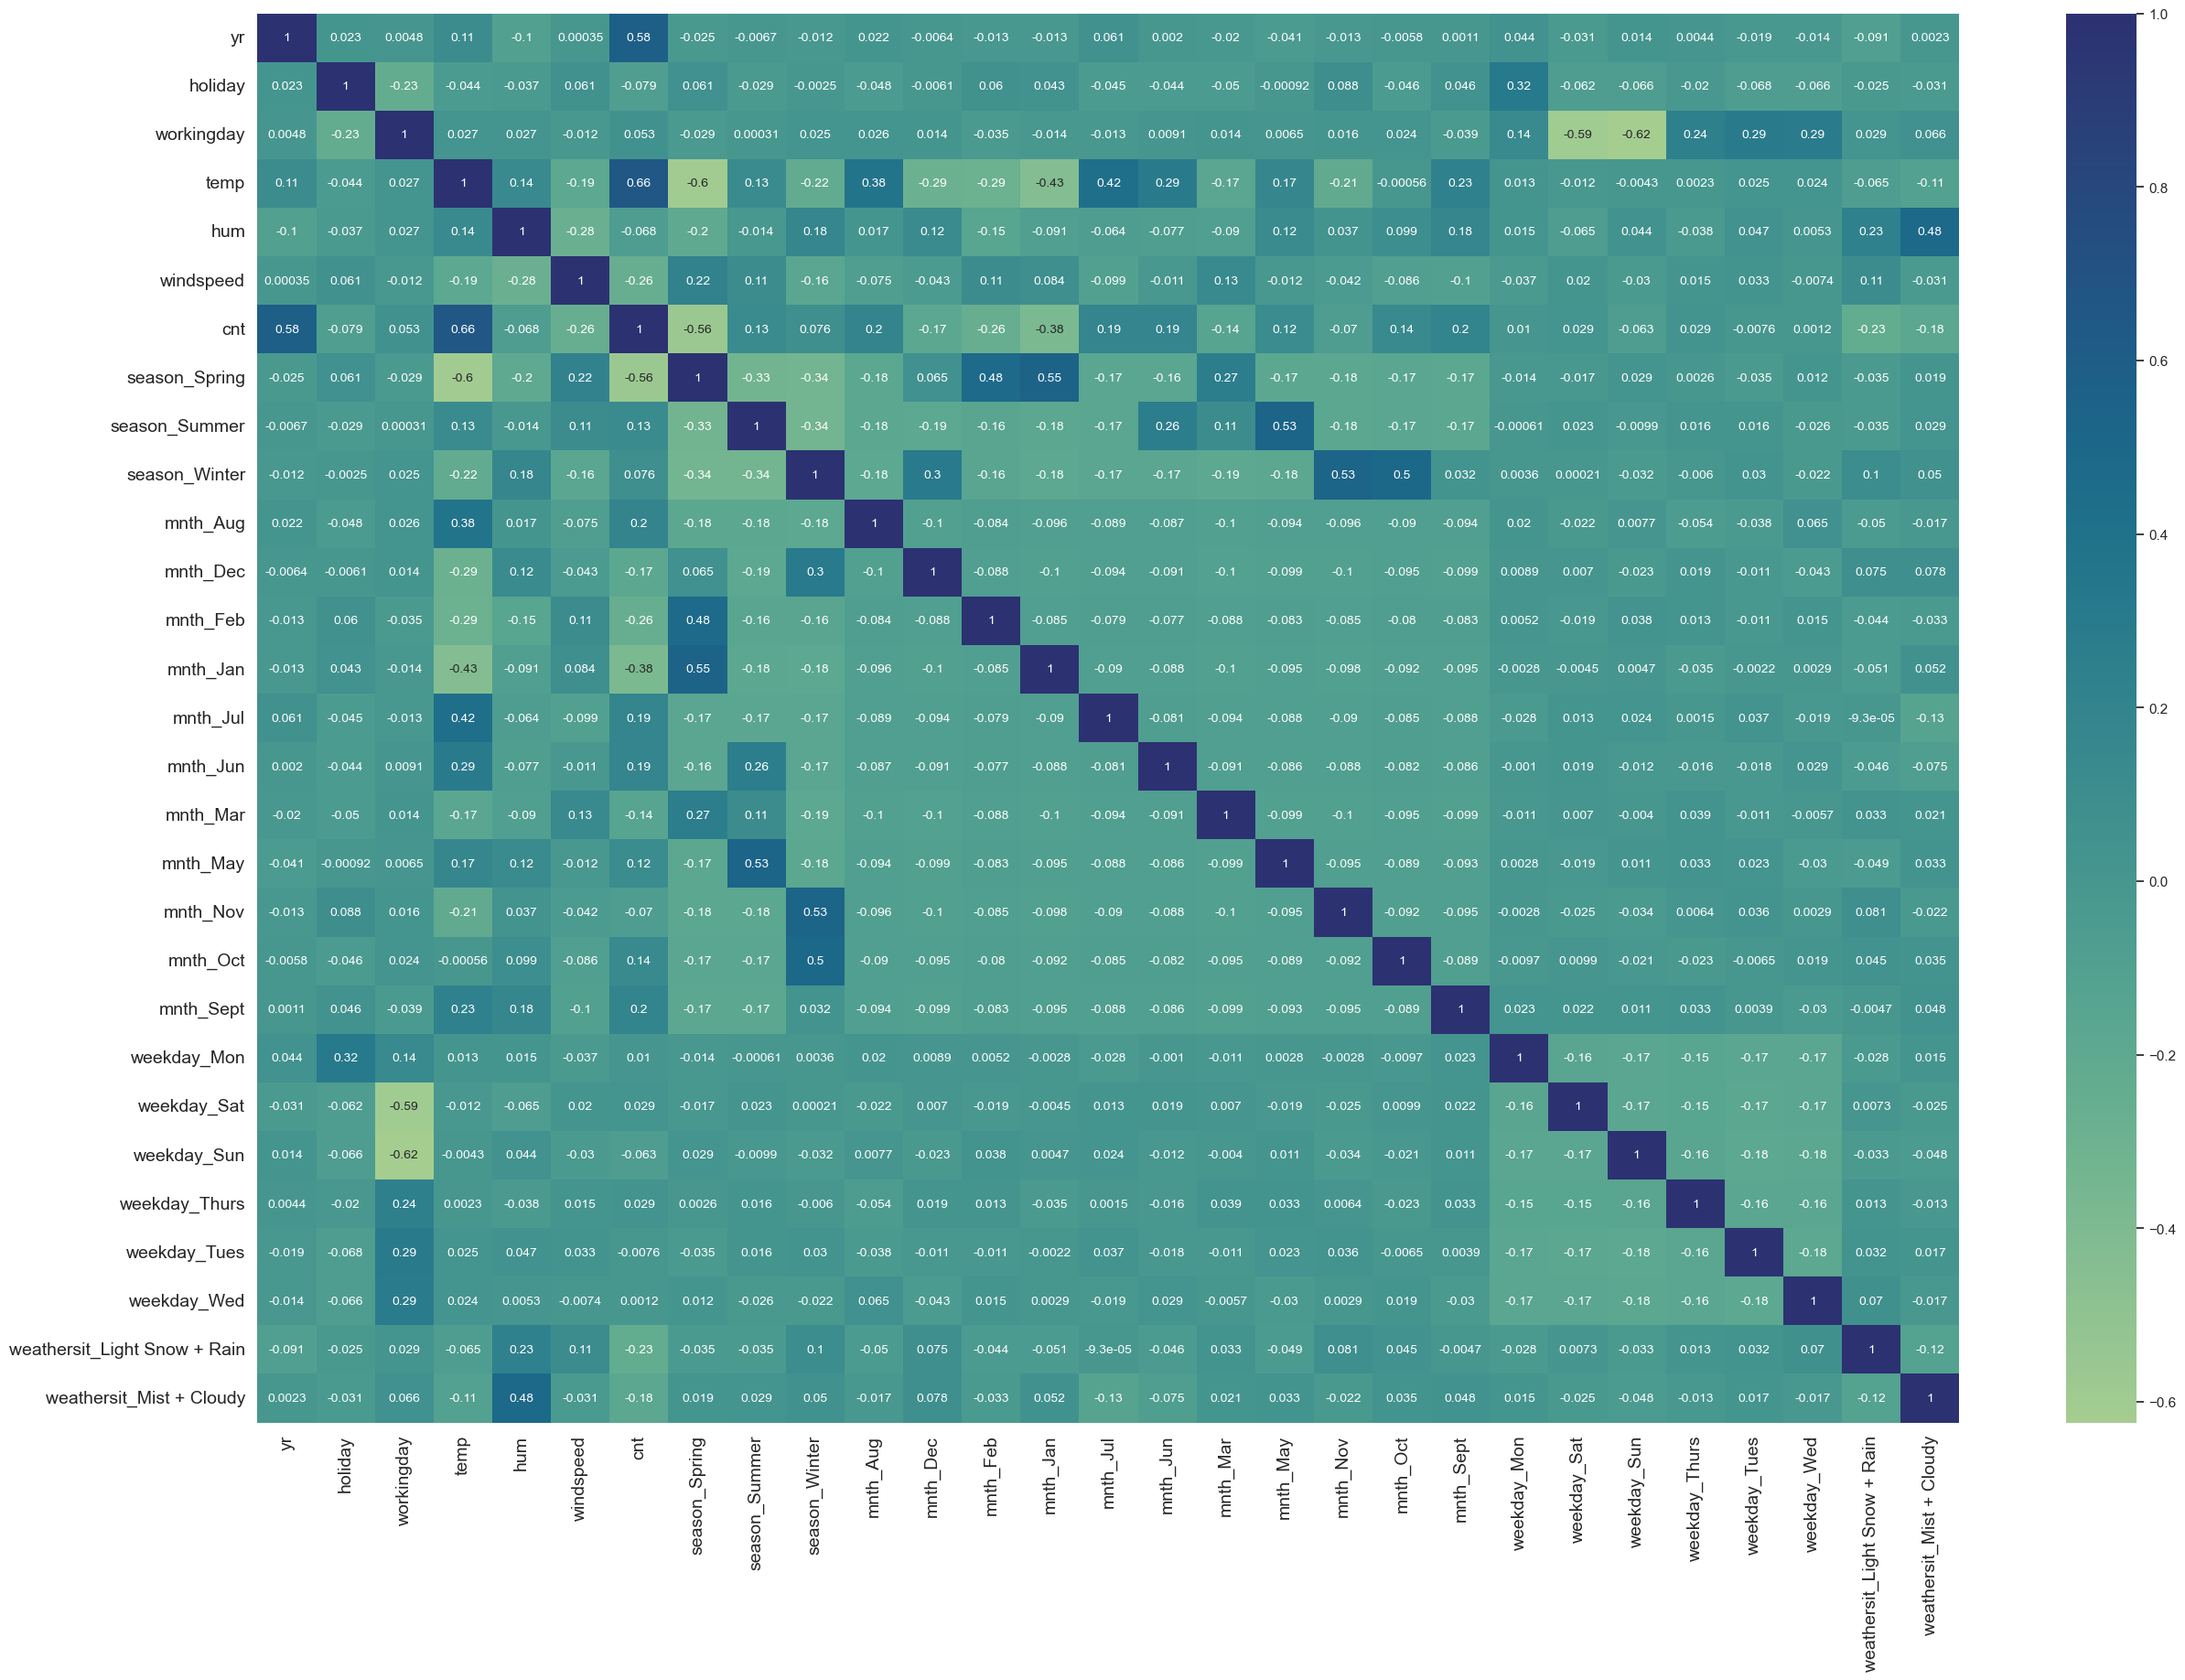

In [35]:
# Plotting a heatmap to check linearity

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="crest",annot_kws={"fontsize":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### **Observation**
From the heatmap we can see temp, yr are correlated to the 'cnt' variable. Even in August, September months we can see the counts are little high.

In [36]:
# Creating our feature and target variable datasets in y_train and X_train

y_train=df_train.pop('cnt')
X_train=df_train[:]

In [37]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow + Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

## **Building a Linear Regression Model**
- Follow **Hybrid Approach ( RFE + Manual Elimination)** 
- **Use Recurssive Feature Elimination** and then p-value and VIF to further eliminate the features 

In [38]:
# Creating a RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)
# setting the limit of our feature variables to 15
rfe = RFE(lm,n_features_to_select=15)
#fitting the object on our train dataset
rfe = rfe.fit(X_train, y_train) 

In [39]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking


,rank,support,features
0,1,True,yr
22,1,True,weekday_Sun
21,1,True,weekday_Sat
17,1,True,mnth_Nov
26,1,True,weathersit_Light Snow + Rain
10,1,True,mnth_Dec
8,1,True,season_Winter
13,1,True,mnth_Jul
6,1,True,season_Spring
1,1,True,holiday


In [40]:
# Selected Features that have significant weights
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'weekday_Sun', 'weekday_Sat', 'mnth_Nov',
       'weathersit_Light Snow + Rain', 'mnth_Dec', 'season_Winter',
       'mnth_Jul', 'season_Spring', 'holiday', 'workingday', 'hum',
       'temp', 'windspeed', 'weathersit_Mist + Cloudy'], dtype=object)

#### Building the model using RFE selected variables.

In [41]:
# Following a manual 1 by 1 elimination

def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model

def vif(X) : 
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### **Model 1**
Using the RFE selected features 

In [42]:
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.04e-193
Time:                        23:27:22   Log-Likelihood:                 499.86
No. Observations:                 506   AIC:                            -969.7
Df Residuals:                     491   BIC:                            -906.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [43]:
vif(X_train[selected_features])

                        Features    VIF
10                    workingday  43.58
1                    weekday_Sun  10.55
2                    weekday_Sat   9.17
12                          temp   3.11
9                        holiday   2.61
8                  season_Spring   2.54
6                  season_Winter   2.25
11                           hum   1.91
3                       mnth_Nov   1.71
14      weathersit_Mist + Cloudy   1.58
5                       mnth_Dec   1.38
7                       mnth_Jul   1.28
4   weathersit_Light Snow + Rain   1.25
13                     windspeed   1.22
0                             yr   1.05


#### **Observations**
- As we can see from the Model Summary, we have holiday whose p-value is > 0.05.

In [44]:
drop_feature = 'holiday'
selected_features = selected_features[selected_features!=drop_feature]
# selected_features = np.append(selected_features, 'weekday_Sun')
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.04e-193
Time:                        23:27:22   Log-Likelihood:                 499.86
No. Observations:                 506   AIC:                            -969.7
Df Residuals:                     491   BIC:                            -906.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [45]:
vif(X_train[selected_features])

                        Features    VIF
10                           hum  29.13
9                     workingday  17.68
11                          temp  17.65
12                     windspeed   5.58
1                    weekday_Sun   4.76
2                    weekday_Sat   4.21
6                  season_Winter   2.94
8                  season_Spring   2.81
13      weathersit_Mist + Cloudy   2.32
0                             yr   2.11
3                       mnth_Nov   1.82
5                       mnth_Dec   1.52
7                       mnth_Jul   1.38
4   weathersit_Light Snow + Rain   1.23


#### **Model 2**
Dropping weekday_Sun due to high p-value 

In [46]:
drop_feature = 'weekday_Sun'
selected_features = selected_features[selected_features!=drop_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     217.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.41e-194
Time:                        23:27:22   Log-Likelihood:                 498.57
No. Observations:                 506   AIC:                            -969.1
Df Residuals:                     492   BIC:                            -910.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [47]:
vif(X_train[selected_features])

                        Features    VIF
9                            hum  22.79
10                          temp  16.52
11                     windspeed   5.07
8                     workingday   4.59
5                  season_Winter   2.87
7                  season_Spring   2.61
12      weathersit_Mist + Cloudy   2.25
0                             yr   2.10
2                       mnth_Nov   1.81
1                    weekday_Sat   1.69
4                       mnth_Dec   1.52
6                       mnth_Jul   1.38
3   weathersit_Light Snow + Rain   1.21


#### **Observations**
- As we can see from the Model Summary, and VIF of humidity is > 5 so dropping it.

#### **Model 3**
Dropping hum  

In [48]:
drop_feature = 'hum'
selected_features = selected_features[selected_features!=drop_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.09e-192
Time:                        23:27:22   Log-Likelihood:                 490.73
No. Observations:                 506   AIC:                            -955.5
Df Residuals:                     493   BIC:                            -900.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [49]:
vif(X_train[selected_features])

                        Features   VIF
9                           temp  6.43
10                     windspeed  5.05
8                     workingday  4.52
5                  season_Winter  2.56
0                             yr  2.09
7                  season_Spring  1.92
2                       mnth_Nov  1.77
1                    weekday_Sat  1.68
11      weathersit_Mist + Cloudy  1.55
4                       mnth_Dec  1.46
6                       mnth_Jul  1.33
3   weathersit_Light Snow + Rain  1.09


#### **Observations**
- As we can see from the Model Summary, and VIF , lets drop mnth_Jul since its highly corelated to temp 

#### **Model 4**
Dropping mnth_Jul

In [50]:
drop_feature = 'mnth_Jul'
selected_features = selected_features[selected_features!=drop_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     237.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.47e-189
Time:                        23:27:23   Log-Likelihood:                 480.39
No. Observations:                 506   AIC:                            -936.8
Df Residuals:                     494   BIC:                            -886.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [51]:
vif(X_train[selected_features])

                        Features   VIF
8                           temp  5.56
9                      windspeed  4.97
7                     workingday  4.50
5                  season_Winter  2.50
0                             yr  2.09
6                  season_Spring  1.92
2                       mnth_Nov  1.77
1                    weekday_Sat  1.68
10      weathersit_Mist + Cloudy  1.54
4                       mnth_Dec  1.45
3   weathersit_Light Snow + Rain  1.09


#### **Observations**
- As we can see from the Model Summary, We have temp and windspeed both having VIF close to 5 marginally, since the windspeed is relatively less corelated to cnt compared to temp , dropping windspeed

#### **Model 5**
Dropping windspeed  

In [52]:
drop_feature = 'windspeed'
selected_features = selected_features[selected_features!=drop_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     246.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.81e-185
Time:                        23:27:23   Log-Likelihood:                 467.80
No. Observations:                 506   AIC:                            -913.6
Df Residuals:                     495   BIC:                            -867.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [53]:
vif(X_train[selected_features])

                       Features   VIF
8                          temp  4.43
7                    workingday  4.35
5                 season_Winter  2.50
0                            yr  2.08
2                      mnth_Nov  1.75
1                   weekday_Sat  1.63
9      weathersit_Mist + Cloudy  1.53
6                 season_Spring  1.52
4                      mnth_Dec  1.45
3  weathersit_Light Snow + Rain  1.07


#### **At this stage, we have an adjusted R-square values 0.829 which means our model explains 82.9% of the variance in the train data.**

In [54]:
lm = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     246.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.81e-185
Time:                        23:27:23   Log-Likelihood:                 467.80
No. Observations:                 506   AIC:                            -913.6
Df Residuals:                     495   BIC:                            -867.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [55]:
vif(X_train[selected_features])

                       Features   VIF
8                          temp  4.43
7                    workingday  4.35
5                 season_Winter  2.50
0                            yr  2.08
2                      mnth_Nov  1.75
1                   weekday_Sat  1.63
9      weathersit_Mist + Cloudy  1.53
6                 season_Spring  1.52
4                      mnth_Dec  1.45
3  weathersit_Light Snow + Rain  1.07


In [56]:
selected_features

array(['yr', 'weekday_Sat', 'mnth_Nov', 'weathersit_Light Snow + Rain',
       'mnth_Dec', 'season_Winter', 'season_Spring', 'workingday', 'temp',
       'weathersit_Mist + Cloudy'], dtype=object)

#### **Final Model Summary**

In [57]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     246.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.81e-185
Time:                        23:27:24   Log-Likelihood:                 467.80
No. Observations:                 506   AIC:                            -913.6
Df Residuals:                     495   BIC:                            -867.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1315      0.025      5.366      0.000       0.083       0.180
yr                               0.2404      0.009     27.491      0.000       0.223       0.258
weekday_Sat                      0.0717      0.016      4.600      0.000       0.041       0.102
mnth_Nov                        -0.0999      0.020     -5.098      0.000      -0.138      -0.061
weathersit_Light Snow + Rain    -0.2803      0.028    -10.054      0.000      -0.335      -0.226
mnth_Dec                        -0.0678      0.017     -3.961      0.000      -0.102      -0.034
season_Winter                    0.1151      0.015      7.919      0.000       0.087       0.144
season_Spring                   -0.1259      0.016     -7.949      0.000      -0.157      -0.095
workingday                       0.0548      0.012      4.710      0.000       0.032       0.078
temp                             0.4536      0.031     14.810      0.000       0.393       0.514
weathersit_Mist + Cloudy        -0.0780      0.009     -8.388      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       75.996   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.544
Skew:                          -0.714   Prob(JB):                     7.81e-49
Kurtosis:                       5.910   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Model Coefficients**

In [58]:
lm.params

const                           0.131488
yr                              0.240374
weekday_Sat                     0.071721
mnth_Nov                       -0.099894
weathersit_Light Snow + Rain   -0.280320
mnth_Dec                       -0.067850
season_Winter                   0.115089
season_Spring                  -0.125942
workingday                      0.054807
temp                            0.453612
weathersit_Mist + Cloudy       -0.077951
dtype: float64

### **Final Model Interpretation**

The **p values** represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
**The VIFs and p-values both are within an acceptable range.**

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- If a VIF is > 5, there is a chance of high multicollinearity. In our case, with values less than 5, we can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.833 or 83.3%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.829 or 82.9%


#### **F Statistics**

F-Statistics is used for testing the overall significance of the Model: **Higher the F-Statistics, more significant the Model is.**
- **F-statistic: 246.2**
- **Prob (F-statistic): 5.81e-185**

**The F-Statistics value of 246.2 (which is greater than 1) and the p-value of < 0.05 states that the overall model is significant**

**The final relationship between demand and predictors is as follows.**

- **cnt** = 0.131488 + (**temp** × 0.453612) + (**yr** × 0.240374) - (**weekday_Sat** × 0.071721) - (**mnth_Nov** × 0.099894) - (**mnth_Dec** × 0.067850) + (**workingday** × 0.054807) + (**season_Winter** × 0.115089) - (**season_Spring** × 0.125942) - (**weathersit_Light Snow + Rain** × 0.280320) - (**weathersit_Mist + Cloudy** × 0.077951)

    where temp is normalized.

#### **Interpretation of Coefficients:**
- **temp**: A coefficient value of ‘0.453612’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.453612 units.
- **weathersit_Light Snow + Rain**: A coefficient value of ‘-0.280320’ indicates that a unit increase in this variable, decreases the bike hire numbers by 0.280320 units.
- **const**: The Constant value of ‘0.131488’ indicated that, in the absence of all other predictor variables features, The bike rental will still increase by 0.131488 units.
  
Similary for other Features coefficients as well we can observe that how they influence the **cnt** target variable from the best fit line equation.

### **Residual Analysis**

In [59]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])
y_train_pred = lm.predict(X_train_sm)

#### **Residuals must be normally distributed**
- **As we can see from the distribution below, our residuals are normally distributed.**

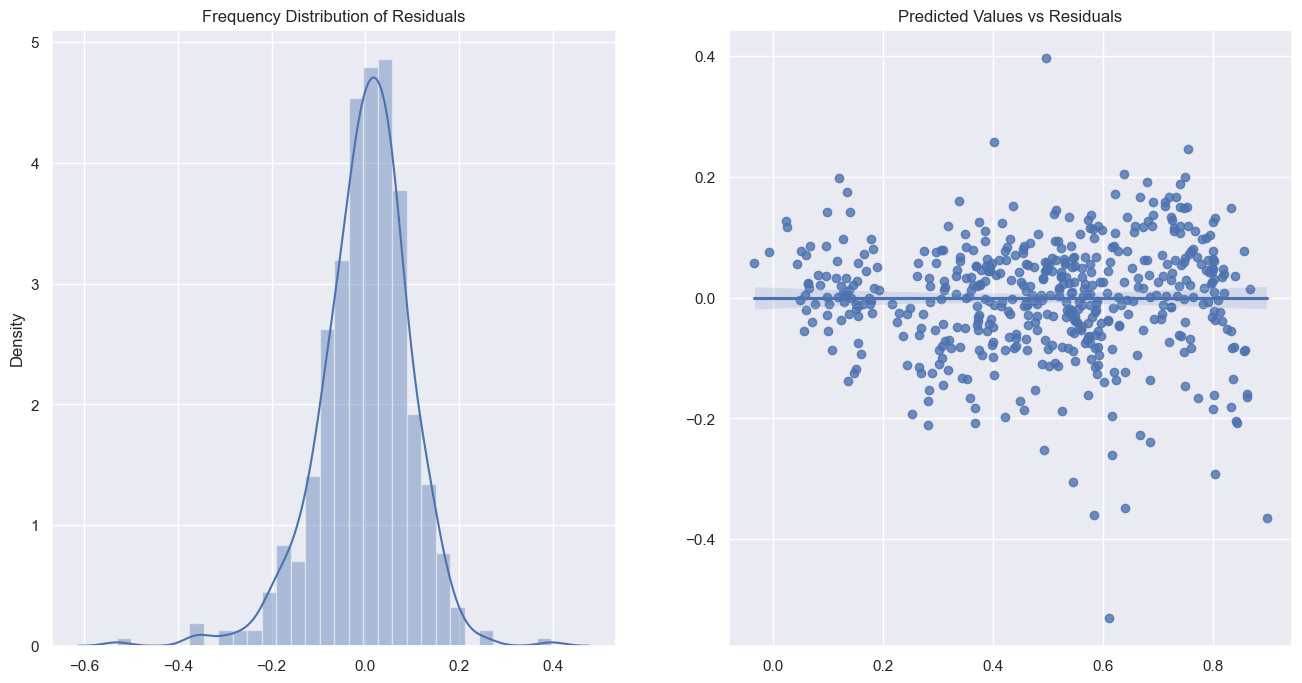

In [60]:

# Plot the histogram of the error terms
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(x=y_train_pred,y=y_train-y_train_pred,ax=ax[1])
plt.show()

In [61]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-7.315184909289075e-16

- Residual errors follow a normal distribution with mean=0
- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.



#### **Linear relationship between target and feature variables**
- As we can see from below pair plots that the cnt target variable increases with increase in numeric features

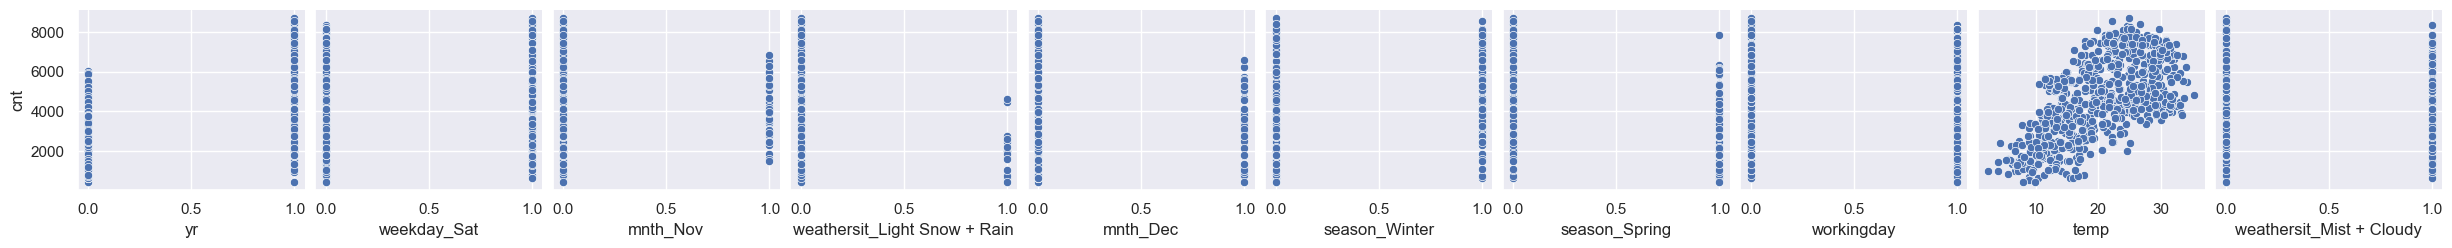

<Figure size 2000x1500 with 0 Axes>

In [62]:
# Pair Plot for numerical variables

sns.pairplot(bike, x_vars=X_train[selected_features].columns, y_vars='cnt')
plt.figure(figsize = (20,15))
plt.show()

#### **No Multicollinearity**
- **As we can see VIFs of all feature variables below 5, so there is no multicollinearity.**

In [63]:
vif(X_train[selected_features])

                       Features   VIF
8                          temp  4.43
7                    workingday  4.35
5                 season_Winter  2.50
0                            yr  2.08
2                      mnth_Nov  1.75
1                   weekday_Sat  1.63
9      weathersit_Mist + Cloudy  1.53
6                 season_Spring  1.52
4                      mnth_Dec  1.45
3  weathersit_Light Snow + Rain  1.07


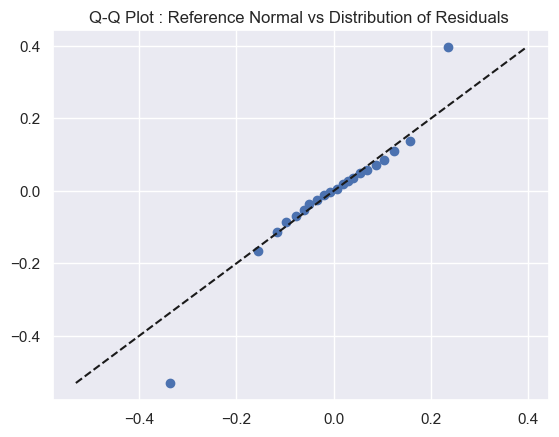

In [64]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()



##### **This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data.**

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

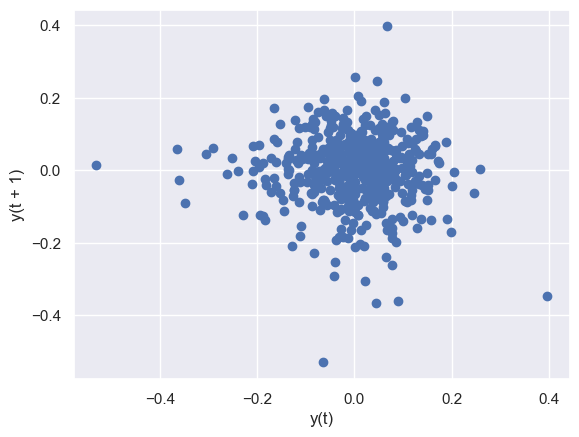

In [65]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

##### **Lagplot of residuals shows no trend. Hence the error terms have constant variance**

#### **No Heteroskedasticity**
- **From the scatter plot, we do not see a funnel like pattern and most of the points are centered around zero. So we do not have any heteroskedasticity.**

Text(0, 0.5, 'Residuals')

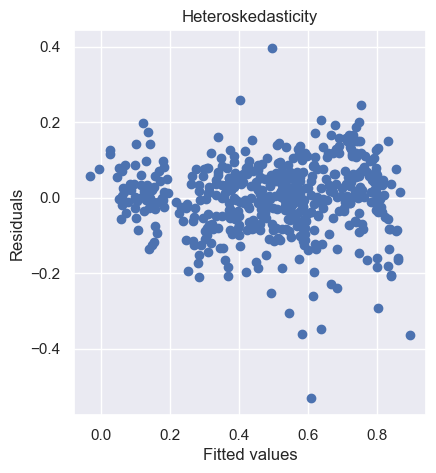

In [66]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Heteroskedasticity")
plt.scatter(y_train_pred, (y_train-y_train_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

### **Hence, assumptions of Linear Regression are satisfied by this model**

### **Making Predictions**

#### Applying the scaling on the test sets

In [67]:
df_test[num_variables]=scaler.fit_transform(df_test[num_variables])

In [68]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.488479,0.041475,0.677419,0.551235,0.499497,0.354169,0.511802,0.253456,0.271889,0.216590,...,0.096774,0.073733,0.161290,0.152074,0.129032,0.179724,0.110599,0.119816,0.027650,0.327189
std,0.501023,0.199846,0.468545,0.251371,0.195690,0.183450,0.240570,0.435996,0.445962,0.412873,...,0.296334,0.261940,0.368649,0.359923,0.336011,0.384845,0.314360,0.325497,0.164346,0.470272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332335,0.366627,0.227368,0.350615,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557149,0.495814,0.331739,0.497782,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.768406,0.622607,0.465717,0.684371,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# Splitting target and feature variables

y_test = df_test.pop('cnt')
X_test = df_test[:]

In [70]:
# Unse the LR model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[selected_features]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [71]:
y_pred = lm.predict(X_test_new)

### **Model Evaluation**

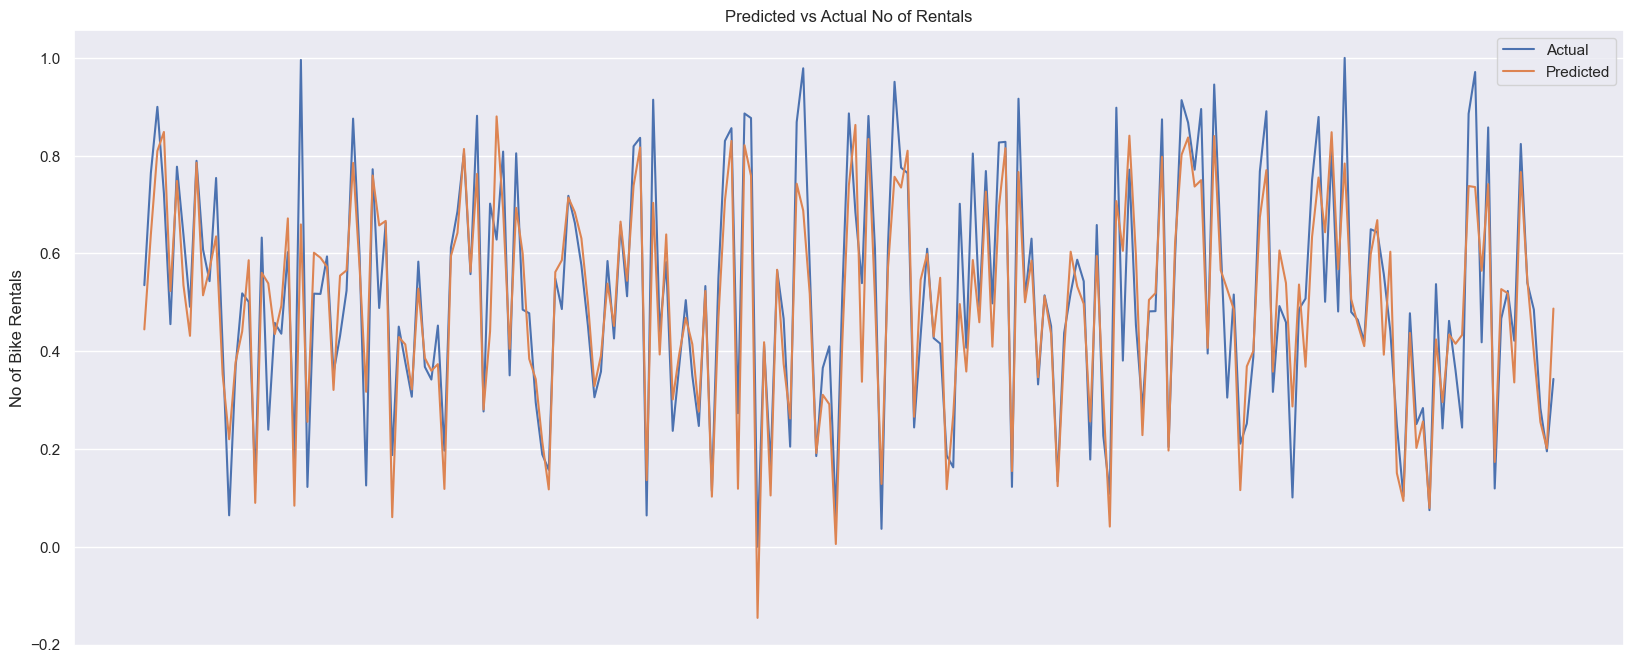

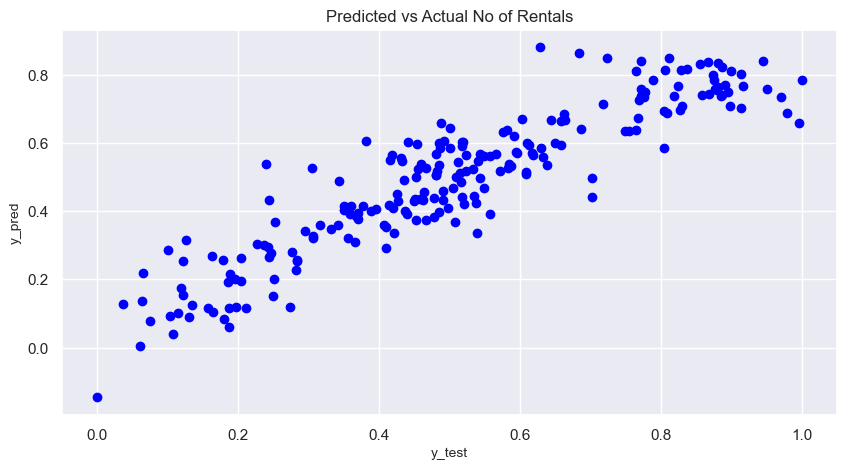

In [72]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[10,5])
plt.scatter(y_test,y_pred, color='blue');
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)  
plt.title('Predicted vs Actual No of Rentals');

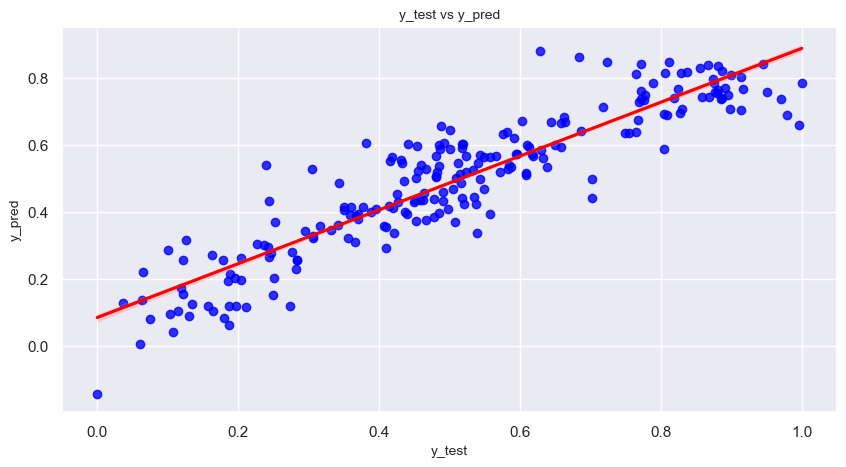

In [73]:
#Linear Regression plot to check the fit on test data 
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, ci=60, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)                          # Y-label
plt.show()

#### **Observation**
- **Predicted vs observed value plots shows that the model is reasonably accurate.**

In [74]:
from sklearn.metrics import mean_squared_error,r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
rsquared_test = r2_score(y_test, y_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,5))
print('R-squared for test data:',round(rsquared_test,5))
print('Mean Squared Error on train data',round(mse_train,3))
print('Mean Squared Error on test data',round(mse_test,3))

R-squared for train data: 0.83262
R-squared for test data: 0.82606
Mean Squared Error on train data 0.009
Mean Squared Error on test data 0.01


#### **Observations**
- **The Mean Squared Error on both train and test data is close to Zero which suggests our model is able to predict both known and unknown data quite accurately**

#### **Adjusted R-Squared for Test data**

In [75]:

n = X_test_new.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# Adjusted R-squared using the formula
adjusted_r2 = 1-(1-rsquared_test)*(n-1)/(n-p-1)
print('The Adjusted R-squared for test data:',round(adjusted_r2,5))


The Adjusted R-squared for test data: 0.81673


### **Model Stability**

In [76]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.82424567, 0.81533836, 0.8573177 , 0.89759442, 0.69909033,
       0.81908002, 0.81129386, 0.70886719, 0.88465777, 0.8665125 ])

In [77]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.13)


### **Final Results Comparison between Train Model and Test Model**

- **Train Data R^2 : 0.83262**
- **Train Data Adjusted R^2 : 0.829**
- **Test Data R^2: 0.82606**
- **Test Data Adjusted R^2: 0.81673**
- **Difference in R^2 between train and test: 0.8%**
- **Difference in adjusted R^2 between Train and test: 1.5% which is less than 5%**


### **Conclusion**

Analysis is carried out using a Mixed Feature Selection Approach. **15 features are selected algorithmically using Recursive Feature Elimination.** Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The **10 most significant features to understand demand have been reported.**

**Model is stable at 82%(+/-13%) coefficient of determination at 95% Confidence level, ascertained through cross validation.**

#### **The Equation for best fitted line -** 
- **cnt** = 0.131488 + (**temp** × 0.453612) + (**yr** × 0.240374) - (**weekday_Sat** × 0.071721) - (**mnth_Nov** × 0.099894) - (**mnth_Dec** × 0.067850) + (**workingday** × 0.054807) + (**season_Winter** × 0.115089) - (**season_Spring** × 0.125942) - (**weathersit_Light Snow + Rain** × 0.280320) - (**weathersit_Mist + Cloudy** × 0.077951)



#### As per the above equation, the **top 3 predictor variables** that influences the bike booking are:

- **Temparature**
- **Light Snow and Rain Weather** 
- **Year**

So these variables should be given maximum significance to increase the bike rent numbers 

#### Some other important Feature Variables are - 
- **Winter season**
- **Spring season**

#### **Business Suggestions -**

- **Temparature is the major driver** and should be given maximum attention to increase bike rental number.
- **Focus should be more on Winter Season and Working Days** since the have positive influence on the bike rentals and boost the rentals.
- We can see **Spring season has negative coefficients** and negatively correlated to bike rentals. So we can **give some offers** there to increase the demand.
- Also we see **negative coefficients for Light Snow , Rain and Misty weather , for this we can also introduce some offers/discounts.**
- Special Schemes can be launched for **Months of Nov and Dec** since they have negative coefficients.
